# PHY 266 HW 2

In [4]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

from math import pi

## Prb 1. Random coordinates on a sphere

### 1 a) As the object is randomly distributed that means the probabilty of detecting it any where in the sky is same. However as we are not selecting random ponits from a spherical surface rather than a plane surface we cann't expect uniform distribution for both $\alpha$ and $\delta$.  The surface element in the plane surface and spherical surface are related by $ dxdy = sin\delta  d\alpha d\delta$. So in a coordintae system for a plane surface both the coordinates would have uniform distributon. However now only RA or $\alpha$ will have a uniform distribution $U(0, 360)$ or $360*U(0,1)$. 


### 1 b) For the reason described above the distribution of $\delta$ is not an uniform distribution. The PDF of $\delta$ is $f(\delta) = Asin\delta$ and ranging from 0 to 180. 'A' is a normalizing factor in the PDF. We can determine A as 
$$\begin{align}
\int_{-\infty}^{\infty} Asin\delta &= 1 \\
\int_{0}^{\pi} Asin\delta &= 1 \\
A & = \frac{1}{2}
\end{align}$$
### Now the CDF of $\delta$ is    
$$ 
\begin{align}
F(\delta) &= \int_{-\infty}^{\delta} f(\delta')d\delta' \\
         &= \int_{0}^{\delta} \frac{1}{2} sin\delta' d\delta' \\ 
          &= -\frac{1}{2} (cos\delta - cos0) \\
          &= \frac{1-cos\delta}{2}
\end{align}$$

### 1 c) We have the equation for CDF of $\delta$. We also know the PDF form of a uniform distribution. Then we can draw samples from U(0,1) which will be treated as F($\delta$) values and using the equation above we can find out the corresponding values of $\delta$. That means if 'x' is a random variable which has a uniform distribution then 
$$\begin{align}
F(\delta) &= F(x) \\
\frac{1-cos\delta}{2}  &= x \\
\delta  &=  cos^{-1}(2x -1)
\end{align}$$

In [22]:
uni_val1 = np.random.uniform(0, 1, size=2500)
uni_val2 = np.random.uniform(0, 1, size=2500)

ra = 360.0 * uni_val1   # right ascention
dec = np.arcsin(2*uni_val2- 1 ) * (180 / pi) # declination in degree

### 1 d) plot to check that the derived values for right ascension  and declination above are indeed uniformly distributed over their respective range.

Text(0, 0.5, 'DEC or $\\delta$')

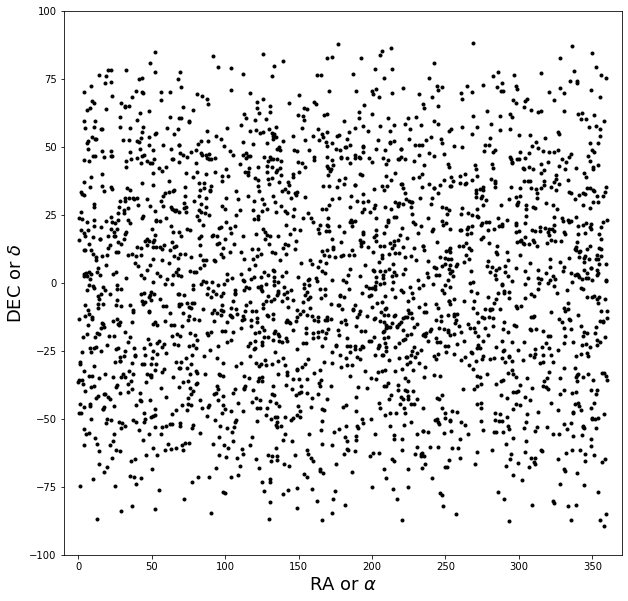

In [27]:
plt.figure(figsize=(10.0, 10.0))
plt.plot(ra, dec, '.k')
plt.ylim(-100, 100)
plt.xlim(-10, 370)
plt.xlabel(r'RA or $\alpha$', fontdict={'fontsize':18})
plt.ylabel(r'DEC or $\delta$', fontdict={'fontsize':18})

## Prb 2. Expected values

### 2 a) The projected length of the meter stick is $cos\theta$ if the viewing angel is $\theta$. And the viewing angle has an uniform distribution ranging from 0 to 90 degree. Then the expected value of the projected length $P_l$ would be 

$E(P_l) = \int_{-\infty}^{\infty}P_ld\theta = \int_{0}^{\frac{\pi}{2}}cos\theta d\theta = 1$

### It seems on average the projected value of length is equal to the true value of the length.

### 2 b) Similarly the expected value of the los velocity would be 
$$E(v_{los}) = \int_{-\infty}^{\infty}v cos\theta d\theta =  \int_{0}^{\frac{\pi}{2}}v cos\theta d\theta
 = v$$

## 3. Combining random variables

### 3a) As we are adding the random variables x and y to get the new variable u then the PDF of u would be $$ \begin{align}
f(u) &= \int_{-\infty}^{\infty}f(x)f(u-x)dx \\
     &=\int_{-0.5}^{0.5}f(x)f(u-x)dx  
\end{align}$$
###  As f(x) is not defined outside $-0.5\leq x \leq 0.5 $.  The PDF of  f(x) is just 1. Then
$$ \begin{align}
f(u) &=\int_{-0.5}^{0.5}f(u-x)dx\\
\end{align}$$
### Let  $ t=u-x$. Then $dt = - dx$. Applying that we get 
$$ \begin{align}
f(u) &= -\int_{u + 0.5}^{u - 0.5}f(t)dt\\
\end{align}$$
### However as we replace the variable from x to t,  the limit where t is defined also changes. And there will be two separate region of interest where t is non zero. The PDF of f(t) is also one. And the region on the left side is 
$$ \begin{align}
f(u)_L &= -\int_{u + 0.5}^{- 0.5}f(t)dt\\
   & = -(-\frac{1}{2} - (u + \frac{1}{2})) \\
   & = u + 1
\end{align}$$
### Then on the right side
$$ \begin{align}
f(u)_R &= -\int_{0.5}^{u - 0.5}f(t)dt\\
   & = -((u - \frac{1}{2}) - \frac{1}{2}) \\
   & = 1 - u
\end{align}$$
### So the PDF of u has a triangular shape ranging from -1 to 1. 
$$
f(u) = \left\{
    \begin{array}\\
        1 + u & \mbox{if } \ -1 \leq u \leq 0 \\
        1- u & \mbox{if } \ 0 \leq u \leq 1 \\
        0 & \mbox{else.}
    \end{array}
\right.
$$
### The plot  for the PDF is below.

Text(0, 0.5, 'f(u)')

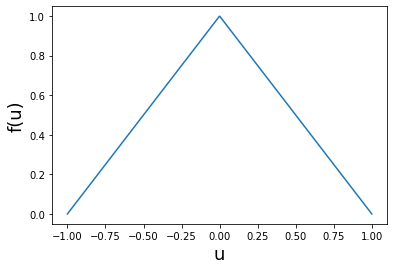

In [8]:
u = np.linspace(-1, 1, 1000)
f_u = np.zeros(len(u))
for i,p in enumerate(u):
    if p >= 0 :
        f_u[i] = 1 - p
    else:
        f_u[i] = 1 + p

plt.plot(u, f_u)
plt.xlabel('u', fontdict={'fontsize':18})
plt.ylabel('f(u)', fontdict={'fontsize':18})

### 3 b) We are going to 5000 samples x and y  distributions which are both uniform distribution. So the histograms for the random varibale x and y will have box shape over their repective range.

Text(0.5, 1.0, 'histogram of y')

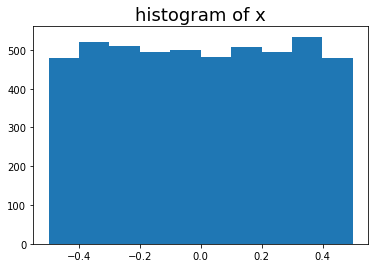

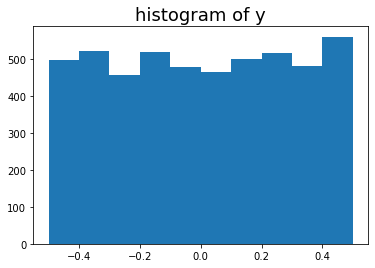

In [24]:
np.random.seed(12345)
x = np.random.uniform(-0.5, 0.5, size=5000)
y = np.random.uniform(-0.5, 0.5, size=5000)

count = plt.hist(x)
plt.title('histogram of x', fontdict={'fontsize':18})
plt.figure()
count = plt.hist(y)
plt.title('histogram of y', fontdict={'fontsize':18})

### 3 c) The histogram of u where u = x+y should look like the PDF we plotted in part a.

Text(0.5, 1.0, 'Histogram of u')

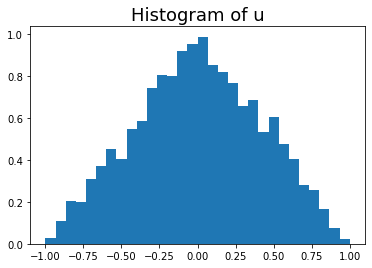

In [25]:
count = plt.hist(x+y, bins=30, density=True)
plt.title('Histogram of u', fontdict={'fontsize':18})

## Prb 4. Magnitudes: a common transformation

### 4 a)  We can calculate the magnitude of the galaxy using the following equation 
$$ m_{g} = m_{\ast} - 2.5\log \frac{f_g}{f_{\ast}} $$
### where $m_{g}$ is the magnitude of the galaxy, $m_{\ast}$ is the magnitude of the star, $f_g$  and $f_{\ast}$ are the pixel value of the galaxy and star respectively. As the flux is a linear measure of the pixel value then the ratio of the pixel values can be used as the ratio of the flux.

### 4 b) If we double the exposure time then the pixel values of both the galaxy and star would get doubled. As we are working with their ratio then we don't need to add any dependence on exposure time.

### 4 c) We can start with the fact that $\frac{d\log x}{dx} = \frac{1}{x}$. Then 
$$\begin{align} 
\int d(\log x) &= \int \frac{dx}{x} \\
         \log x &= \int \frac{dx}{x} \\
 \end{align}$$ 
### Now $\frac{dx}{x}$ is a dimensionless ratio. So we can say that logarithm of any quantity x can be expressed as the sum of some dimensionless ratios or numbers. Or logarithm of anything is dimensionless.

### 4 d) The uncertainty on magnitude of galaxy $\sigma_{mg}$ is related to other variable in the following way
$$\begin{align}
\sigma_{m_g}^2 &= |\frac{\partial m_{g}}{\partial f_g} |^2 \sigma_{f_g}^2 \\
         &= (-2.5\frac{1}{f_g})^2 \sigma_{f_g}^2 \\
 \sigma_{m_g} &= \pm 2.5 \frac{\sigma_{f_g}}{f_g}
\end{align}$$

### 4 e) When we are calculating $\sigma_{mg}$  we are actually multiplying the slope of the $m_g$ vs $f_g$ graph which is  $|\frac{\partial m_{g}}{\partial f_g} |$ with the uncertainty of the $f_g$ which is $\sigma_{f_g}$. As $m_g$ is a  logarithmic function of $f_g$ then the slope of the graph will very significantly from one side to the other. As a result same amount of uncertainty in $f_g$ will project totally different amount in uncertainty of $m_g$ depending on the slope. That means for very large flux values cenrtain amount of uncertainty will result in  small uncertainty in $m_g$. However for very small flux values that same amount of uncertainty in flux will result in pretty big uncertainty in $m_g$.